## Flu Shot Learning: Predict H1N1 & Seasonal Flu Vaccines

In [1]:
# Import libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import curdir

# Assign data path
training_features_path = os.path.join(curdir, 'training_set_features.csv')
training_labels_path = os.path.join(curdir, 'training_set_labels.csv')
test_path = os.path.join(curdir, 'test_set_features.csv')

# Load.csv
training_features = pd.read_csv('training_set_features.csv', index_col = 'respondent_id')
training_labels = pd.read_csv('training_set_labels.csv', index_col = 'respondent_id')
test_features = pd.read_csv('test_set_features.csv', index_col = 'respondent_id')

In [2]:
# Check the shape of theree datasets
print('Number of Data in training features', training_features.shape)
print('Number of Data in training labels',training_labels.shape)
print('Number of Data in test features',test_features.shape)

Number of Data in training features (26707, 35)
Number of Data in training labels (26707, 2)
Number of Data in test features (26708, 35)


### Combine datasets

In [3]:
# Join two datasets
combined_training = training_features.join(training_labels)

# Checking number of rows
print('Number of Data in the Training Combined Dataset',combined_training.shape)

# Checking first 5 data from combined dataset
combined_training.head()

Number of Data in the Training Combined Dataset (26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [4]:
# Check the number of data
print(combined_training.shape)
print(test_features.shape)

(26707, 37)
(26708, 35)


In [5]:
# Check datatypes of combined training dataset
combined_training.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

### Differentiate columns

In [6]:
# NUmeric columns
num_cols = combined_training.select_dtypes('number').columns
num_cols

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [7]:
# Categorical columns
cat_cols = ['race', 'sex', 
       'marital_status', 'rent_or_own',  'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation']

In [8]:
# Ordinal columns
ord_cols = ['age_group', 'education',  'income_poverty',
        'employment_status']

### Create XGBoost model using Pipeline

In [9]:
# Import libraries
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import xgboost as xgb
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

In [10]:
# Separate features and labels
features = combined_training.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
labels = combined_training[['h1n1_vaccine', 'seasonal_vaccine']]

# Define the column transformer for preprocessing
numeric_features = features.select_dtypes(include=['float64', 'int64']).columns
categorical_features = features.select_dtypes(include=['object']).columns

In [11]:
# Define the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric_imputer', KNNImputer(n_neighbors=5), numeric_features),
        ('categorical_encoder', OneHotEncoder(drop='first'), categorical_features),
        ('scaler', StandardScaler(), numeric_features)
    ])

In [12]:
# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Define multioutput classifer
xgb_multi = MultiOutputClassifier(xgb_model)

In [13]:
# Define the pipeline
pipeline = Pipeline([('preprocessor', preprocessor),
                    ('Multioutputclassifer', xgb_multi)])

In [14]:
# Split the data into train and test sets with stratified sampling
X_train, X_eval, y_train, y_eval = train_test_split(features, labels, test_size=0.33, stratify=labels)

In [15]:
# Define hyperparameter grid
param_grid = {'Multioutputclassifer__estimator__n_estimators': [200, 300, 400, 500], 
              'Multioutputclassifer__estimator__max_depth': [3, 4, 5, 6, 7],
              'Multioutputclassifer__estimator__learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4]}

# Initialize gridsearch object
grid_search = GridSearchCV(estimator=pipeline, param_grid = param_grid, cv=10, scoring='roc_auc', refit=True)

# Fit the Grid Search object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'Multioutputclassifer__estimator__learning_rate': 0.1, 'Multioutputclassifer__estimator__max_depth': 3, 'Multioutputclassifer__estimator__n_estimators': 200}


In [16]:
# Assign the best hyperparameters
best_params = grid_search.best_params_

In [17]:
# Train the pipeline with the best hyperparameters for h1n1_vaccine
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MultiOutputClassifier(xgb.XGBClassifier(learning_rate = best_params['Multioutputclassifer__estimator__learning_rate'],
                                      max_depth = best_params['Multioutputclassifer__estimator__max_depth'],
                                     n_estimators = best_params['Multioutputclassifer__estimator__n_estimators'])))
])

In [18]:
# Fit train datasets with pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_imputer',
                                                  KNNImputer(),
                                                  Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seaso...
                                                               gpu_id=None,
                                                               grow_policy=None,
                                                               importance_type=None,
                                                               interaction_constraints=None,
                                                               learning_rate=0.1,
                                                               max_bin=None,
 

In [19]:
# Make predictions for both vaccines
y_eval_predictions = pipeline.predict(X_eval)
y_eval_probabilities = pipeline.predict_proba(X_eval)[0][:,1]  # Probability of positive class (1)

In [23]:
# Import libraries for visualizations and reports
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

### Confusion Matrix

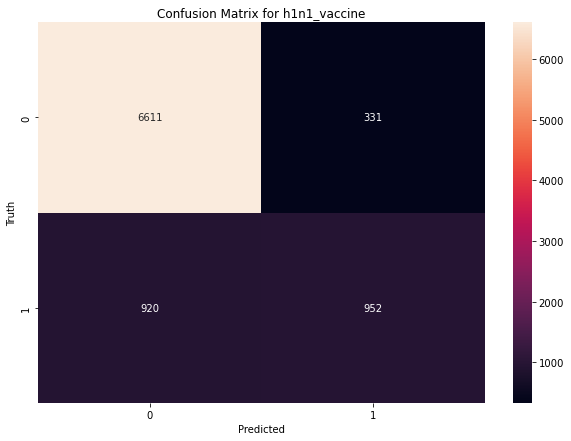

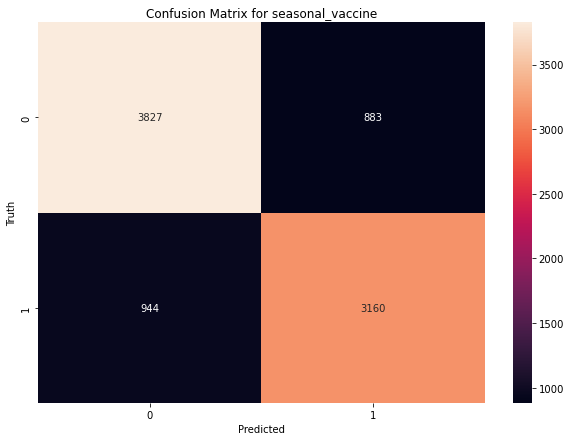

In [25]:
# Confusion matrix for H1N1
for i in range(y_eval.shape[1]):
    cm = confusion_matrix(y_eval.iloc[:, i], y_eval_predictions[:, i])
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title(f'Confusion Matrix for {y_eval.columns[i]}')
    plt.show()

### Classification Report

In [26]:
# Create classification report for Seasonal Vaccine
for i in range(y_eval.shape[1]):
    print(f"Classification Report for {y_eval.columns[i]}:")
    print(classification_report(y_eval.iloc[:, i], y_eval_predictions[:, i]))

Classification Report for h1n1_vaccine:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6942
           1       0.74      0.51      0.60      1872

    accuracy                           0.86      8814
   macro avg       0.81      0.73      0.76      8814
weighted avg       0.85      0.86      0.85      8814

Classification Report for seasonal_vaccine:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      4710
           1       0.78      0.77      0.78      4104

    accuracy                           0.79      8814
   macro avg       0.79      0.79      0.79      8814
weighted avg       0.79      0.79      0.79      8814



In [28]:
# Predict probabilities for the test set
y_pred_proba = pipeline.predict_proba(test_features)

y_preds = pd.DataFrame({
        "h1n1_vaccine": y_pred_proba[0][:, 1],
        "seasonal_vaccine": y_pred_proba[1][:, 1]
                       })

print("y_preds.shape:", y_preds.shape)

y_preds.head()

y_preds.shape: (26708, 2)


,h1n1_vaccine,seasonal_vaccine
0,0.073727,0.231186
1,0.031817,0.041353
2,0.282914,0.720268
3,0.603483,0.873363
4,0.362912,0.585419


### Predictions Set for Submission

In [29]:
test_probas = pipeline.predict_proba(test_features)
test_probas

[array([[0.92627263, 0.07372735],
        [0.9681828 , 0.03181719],
        [0.7170861 , 0.28291395],
        ...,
        [0.8584257 , 0.14157432],
        [0.97094166, 0.02905834],
        [0.3913803 , 0.6086197 ]], dtype=float32),
 array([[0.76881444, 0.23118559],
        [0.95864725, 0.04135272],
        [0.27973163, 0.72026837],
        ...,
        [0.6993574 , 0.3006426 ],
        [0.67832565, 0.32167438],
        [0.37921077, 0.62078923]], dtype=float32)]

In [30]:
# Create submission file
submission = pd.read_csv('submission_format.csv', index_col="respondent_id")

In [31]:
# Make sure we have the rows in the same order
np.testing.assert_array_equal(test_features.index.values, submission.index.values)

# Save predictions to submission data frame
submission["h1n1_vaccine"] = test_probas[0][:, 1]
submission["seasonal_vaccine"] = test_probas[1][:, 1]

submission.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.073727,0.231186
26708,0.031817,0.041353
26709,0.282914,0.720268
26710,0.603483,0.873363
26711,0.362912,0.585419


In [32]:
submission.to_csv('submission20240309.csv', index=True)